# Examen 2do Parcial

### Métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

In [38]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [39]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


## 1.1 Dataset de Coactivation Matrix
1.1.1 Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)1.1.2 
Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

### 1.1.1 Método de Codo para cluster óptimo

In [42]:
file_path = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\coactivation_matrix\Coactivation_matrix.mat"
mat_data = loadmat(file_path)

coactivation_matrix = mat_data['Coactivation_matrix'] 
#Normalizar los pishis datos xd (La normalización es importante porque K-Means usa distancias,
# y es mejor si todas las características están en la misma escala.)
scaler = StandardScaler()
X_std = scaler.fit_transform(coactivation_matrix)

#Hay que crear una lista de nombres de columnas para el DataFrame.
column_names = [f'Feature_{i+1}' for i in range(coactivation_matrix.shape[1])]  # Ajusta nombres si tienes específicos
df_std = pd.DataFrame(data=X_std, columns=column_names)

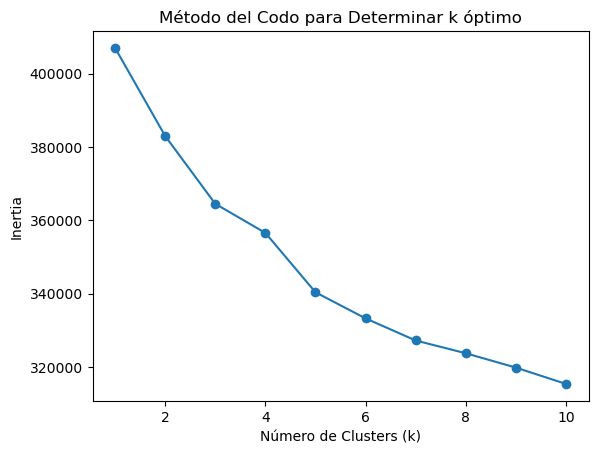

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar diferentes cantidades de clusters
inertia = []
num_clusters = range(1, 11)

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo para Determinar k óptimo')
plt.show()


### 1.1.2 Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

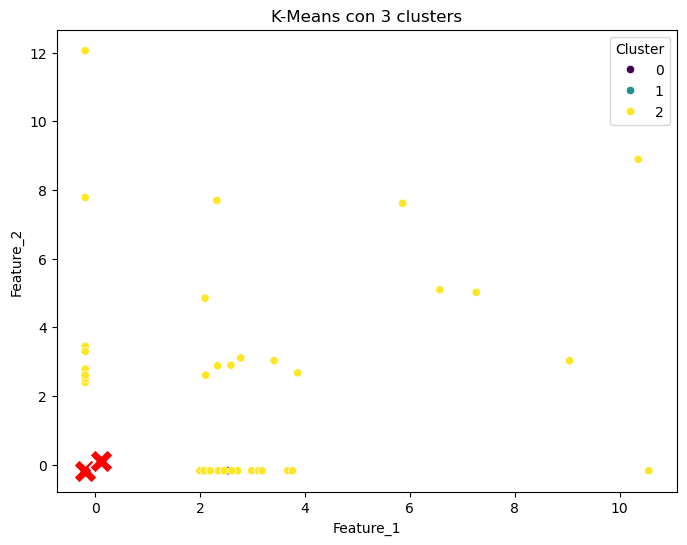

Número real de iteraciones: 8


In [45]:
# Aplicar K-Means con 3 clusters
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
kmeans.fit(X_std)

# Agregar los clusters al DataFrame
df_std['kmeans'] = kmeans.labels_
clusters_df = kmeans.cluster_centers_

# Gráfico de dispersión con etiquetas de cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_std, x=column_names[0], y=column_names[1], hue='kmeans', palette='viridis')
sns.scatterplot(x=clusters_df[:, 0], y=clusters_df[:, 1], marker="X", color='r', s=300)

plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title(f'K-Means con {no_clusters} clusters')
plt.legend(title='Cluster')
plt.show()

print(f'Número real de iteraciones: {kmeans.n_iter_}')

#NOTAS: Por defecto Scikit-learn ejecuta hasta max_iter=300 iteraciones, pero puede detenerse antes si los
# centroides dejan de cambiar significativamente.

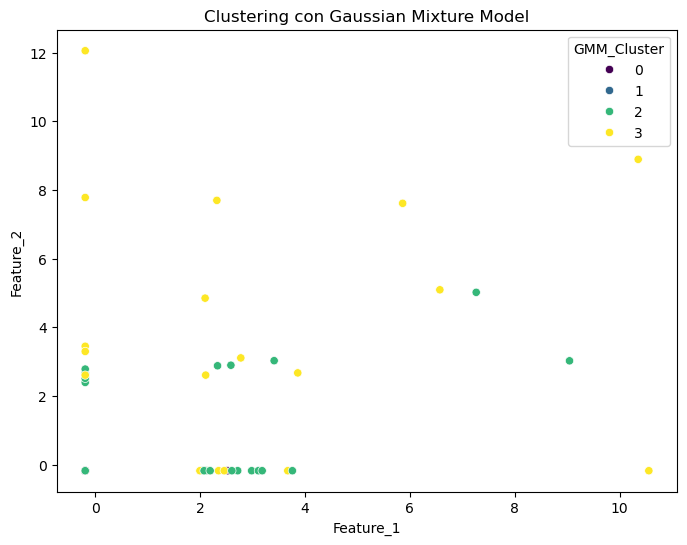

In [46]:
#Ahora van las Gaussianas xd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Definir modelo GMM con 4 clusters (con 3 de plano no se ve nada)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X_std) # Ajustar GMM a los datos

# Predecir los clusters
gmm_labels = gmm.predict(X_std)

# Agregar los clusters al DataFrame
df_std['GMM_Cluster'] = gmm_labels

# Gráfico de dispersión con GMM
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_std, x=column_names[0], y=column_names[1], hue='GMM_Cluster', palette='viridis')
plt.title('Clustering con Gaussian Mixture Model')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.show()


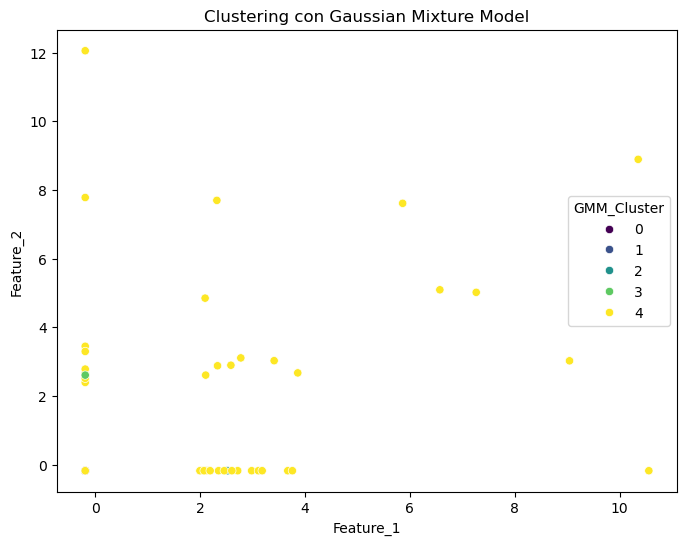

In [47]:
# Definir modelo GMM ahora con 5 clusters
gmm = GaussianMixture(n_components=5, random_state=42) 
gmm.fit(X_std)

gmm_labels = gmm.predict(X_std)

df_std['GMM_Cluster'] = gmm_labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_std, x=column_names[0], y=column_names[1], hue='GMM_Cluster', palette='viridis')
plt.title('Clustering con Gaussian Mixture Model')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.show()


Estuve buscando y quizás no salen bien con ninugno de lo  metodos dado a que los patrones de la matriz de coactivación no sean facilmente diferenciables con estos dos métodos unu. no jala xd

# 2. Brain Tumor

Columnas en el dataset: Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')
Todas las columnas están disponibles.
Valores de inercia: [45144.000000000015, 31738.889382972116, 25274.74447958733, 20661.134785813163, 19370.993373944984, 16602.813155826152, 14905.188288203906, 13706.917415623553, 12455.535966905281, 12044.871125997106, 11096.047797209256, 10713.898801450734, 10265.06370537671, 9908.972987590243]


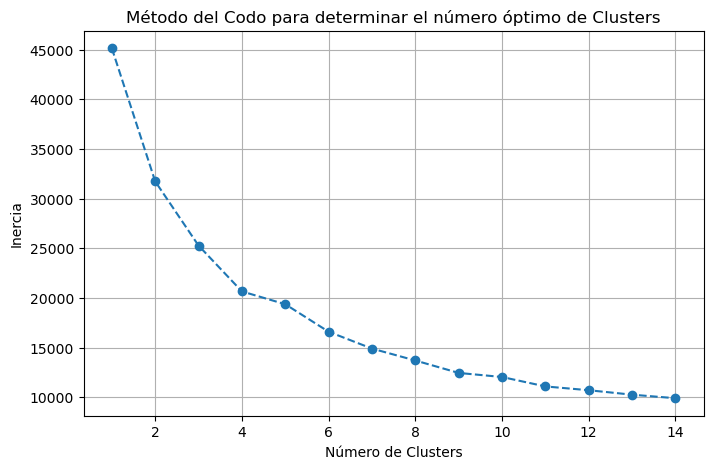

In [50]:
### Generar el método del codo XD
file_bt_path = r"C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"
df_bt = pd.read_csv(file_bt_path)

# Verificar las columnas disponibles en el dataset
print("Columnas en el dataset:", df_bt.columns)

# Definir las características a usar (con qué trabajaremos)
features = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 
            'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 
            'Dissimilarity', 'Correlation', 'Coarseness']

# Verificar que las columnas existen en el dataset
missing_features = [col for col in features if col not in df_bt.columns]
if missing_features:
    print(f"Columnas faltantes en el dataset: {missing_features}")
else:
    print("Todas las columnas están disponibles.")

# Filtrar el dataset para usar solo las características seleccionadas
X = df_bt[features]

# Normalización de los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Rango de clusters a evaluar
clusters = range(1, 15)  # Expandimos el rango a más clusters
inertia = []

# Aplicar K-Means y calcular la inercia
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

print(f'Valores de inercia: {inertia}')

plt.figure(figsize=(8, 5))
plt.plot(clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de Clusters')
plt.grid()
plt.show()


### K means clustering uwu

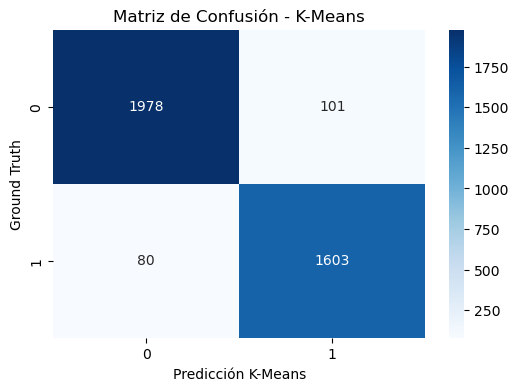

In [89]:
# Aplicar K-Means con 2 clusters
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

# Calcular matriz de confusión
cm_kmeans = confusion_matrix(df_bt['Class'], kmeans_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción K-Means')
plt.ylabel('Ground Truth')
plt.title('Matriz de Confusión - K-Means')
plt.show()


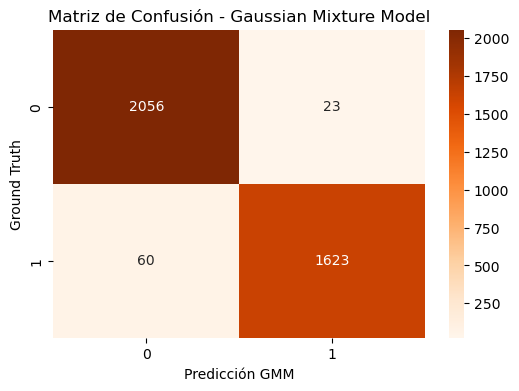

In [91]:
from sklearn.mixture import GaussianMixture

# Aplicar Gaussian Mixture con 2 clusters
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_std)

# Calcular matriz de confusión
cm_gmm = confusion_matrix(df_bt['Class'], gmm_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_gmm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción GMM')
plt.ylabel('Ground Truth')
plt.title('Matriz de Confusión - Gaussian Mixture Model')
plt.show()


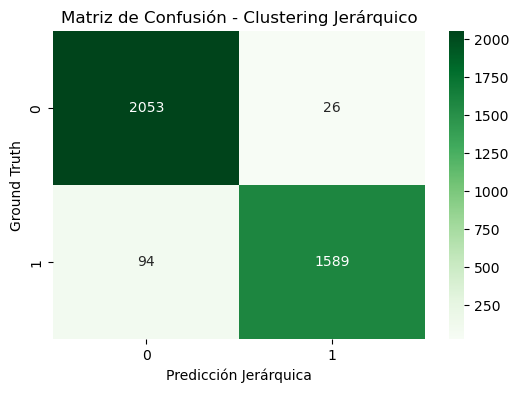

In [166]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar clustering jerárquico con método 'ward'
Z = linkage(X_std, method='ward')
hierarchical_labels = fcluster(Z, 2, criterion='maxclust')  # ← Genera nuevas etiquetas
hierarchical_labels = (hierarchical_labels - 1)  # ← Las convierte a 0 y 1

# Calcular matriz de confusión
cm_hierarchical = confusion_matrix(df_bt['Class'], hierarchical_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_hierarchical, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicción Jerárquica')
plt.ylabel('Ground Truth')
plt.title('Matriz de Confusión - Clustering Jerárquico')
plt.show()


### ¿Qué método recomendarías para este dataset?, ¿por qué?

Basado en las matrices de confusión analizadas, GMM parece ser la mejor opción en este caso, ya que tuvo la menor cantidad de errores y asignó mejor los clusters. K-Means funciona bien pero el pex es que tiene más errores FP y FN que GMM. Clustering Jerárquico muestra buenos resultados en dos clases, pero no detectó la tercera clase correctamente, lo que puede indicar que este método no es adecuado para este dataset en particular.

# 3.0 CONCEPTOS CLAVE DEL ANALISIS DE MODELOS DE CLASIFICACION


### 3.1 Precisión
La precisión mide la proporción de verdaderos positivos (TP) sobre todos los casos que el modelo predijo como positivos. En otras palbras, te dice qué tan correcto es el modelo cuando dice que algo es positivo.

Interpretación:

•	Alta precisión: El modelo comete pocos falsos positivos (FP).

•	Baja precisión: El modelo etiqueta muchos negativos como positivos, generando falsos positivos
.Fórmula uwu: TP/(TP + FP)
.


### 3.2 Accuracy (Exactitud o precisión global)
La exactitud mide la proporción de predicciones correctas sobre el total de observaciones, es decir, evalúa qué tan bien predice el modelo en general.

Interpretación:

•	Alta exactitud: El modelo clasifica correctamente la mayoría de los casos.

•	Puede ser engañosa si la clase positiva es poco frecuent)

Fórmula: (TP + TN)/(TP + TN + FP + FN)


### 3.3 Recall (Sensibilidad o Exhaustividad)
El recall mide la proporción de verdaderos positivos (TP) sobre todos los casos que realmente eran positivos, es una medida que nos dice qué tanto el modelo recuerda (detecta) los positivos reales.

Interpretación:

•	Alto recall: El modelo identifica casi todos los casos positivos.
•	Bajo recall: El modelo pierde muchos positivos reales más (falsos negativos, FN).
Fórmula: TP/(TP + FN)


### 3.4 F1-Score (Media Armónica de Precisión y Recall)
El F1-Score combina precisión y recall en una media armónica, proporcionando una métrica equilibrada, especialmente útil cuando hay desbalance de clases.

Interpretación:

•	Un F1 cercano a 1 indica un modelo balanceado entre precisión y recall.
•	Un F1 cercano a 0 indica que el modelo es deficiente en ambos aspectos.
Fórmula: 2 x (Precisión x Recall/Precisión + Recall)


# 4. ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?
Bueno, pues para obtener cada una de estas medidas para el análisis de modelos de clasificación es necesario en principio obtener los valores de la matriz de confusión, ya que cuando un modelo de clasificación hace predicciones, los resultados pueden clasificarse en 4 categorías principales que forman la matriz de confusión.

Los datos que nos arrojan son:
TP(True Positive) FN(False Negative)

FP(False Positive) TN(True Negative))


# 5. Obtener Medidas

In [156]:
def calcular_metricas(matriz_conf):
    
    TP = matriz_conf[1, 1]  # clase 1 correctamente clasificada
    TN = matriz_conf[0, 0]  # clase 0 correctamente clasificada
    FP = matriz_conf[0, 1]  # clase 0 mal clasificada como clase 1
    FN = matriz_conf[1, 0]  # clase 1 mal clasificada como clase 0
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'Precisión': precision,
        'Exactitud': exactitud,
        'Recuperación': recall,
        'F1-Score': f1_score
    }

In [158]:
import pandas as pd

metricas_kmeans = calcular_metricas(confusion_matrix(df_bt['Class'], kmeans_labels))
metricas_gmm = calcular_metricas(confusion_matrix(df_bt['Class'], gmm_labels))
metricas_jerarquico = calcular_metricas(confusion_matrix(df_bt['Class'], hierarchical_labels))

tabla_metricas = pd.DataFrame({
    "Métrica": ["Precisión", "Exactitud", "Recuperación", "F1-Score"],
    "K-Means": [round(value, 4) for value in metricas_kmeans.values()],
    "Gaussian Mixture": [round(value, 4) for value in metricas_gmm.values()],
    "Clustering Jerárquico": [round(value, 4) for value in metricas_jerarquico.values()]
})

print(tabla_metricas)

        Métrica  K-Means  Gaussian Mixture  Clustering Jerárquico
0     Precisión   0.9407            0.9860                 0.9839
1     Exactitud   0.9519            0.9779                 0.9681
2  Recuperación   0.9525            0.9643                 0.9441
3      F1-Score   0.9466            0.9751                 0.9636


Finnn, todo tiene un fiiinnnn xd, al final pudimos verificar que, en efecto, es el Gaussian Mixture el mejor método para clasificar nuestros datos.   :D

Al final todo estará bien, y si no está bien no hemos llegado al final. - Pelusa Caligari